# ***Electric car sharing company***



### ***Overall research question***

It is to investigate claims about blue cars from the provided autolib dataset.

***Research Question***

1. Determining the total number of blue cars from the  stations in paris on Weekdays.
2. Finding the mean of the total number of blue cars from the stations in Paris on Weekdays.

### **Hypothesis**

**Claim:** The same total number of bluecars are taken from stations in Paris on Weekdays.

**Null hypothesis:** There is no difference in the total number of bluecars taken from stations on weekdays.

**Alternative hypothesis** Their is a difference between the total number of bluecars taken from the stations on weekdays.



### **Context**

Introduced more than 100 years ago, electric cars are seeing a rise in popularity today for many of the same reasons they were first popular.Whether it’s a hybrid, plug-in hybrid or all-electric, the demand for electric drive vehicles will continue to climb as prices drop and consumers look for ways to save money at the pump. Currently more than 3 percent of new vehicle sales, electric vehicles sales could to grow to nearly 7 percent -- or 6.6 million per year -- worldwide by 2020, according to a report by Navigant Research. Therefore the autolib car sharing company wants to investigate claims about bluecars in the region.



## **Metric for Success**

1. Sampling the data
2. Choosing the best test method ie Ttest,Anova,Chi square test
3. Determine the P value
4. Reject the null hypothesis or fail to reject the null hypothesis

## **Experimental Design**

The Experimental Design of this project will follow the CRISP DM methodology and the steps are as follows:

1. Business Understanding.
2. Data Understanding.
3. Data Preparation.
4. Analysis.
5. Evaluation.

### **Appropriateness of the data**

The data provided contains columns that will help us answer the relevant question.

### **Importing the Libraries**

In [3]:
#Ill use numpy when working with arrays
import numpy as np
#Ill use pandas for data cleaning and analysis
import pandas as pd
#Ill use seaborn for data visualisation
import seaborn as sns
#Ill use matplotlib for data visualisation
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Ill then preview the dataset 
df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [5]:
#Checking the column names of the dataset
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [8]:
#Ill then check the number of columns and rows of teh dataset
df.shape
#Their are 16085 rows and 13 columns

(16085, 13)

In [9]:
#Ill then check the datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## **Data Cleaning**

In [6]:
#Ill select datetype = weekday since we are working with weekdays only
df = df[df['day_type'] == 'weekday']
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [56]:
#Ill then check for duplicated values in the dataset

df.duplicated().sum()
#No duplicated values

0

In [57]:
#Ill then check foe null values in the dataset
df.isnull().sum()
#Their are no null values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [7]:
#Ill then covert date column to date time
df.date = pd.to_datetime(df.date)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11544 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             11544 non-null  int64         
 1   date                    11544 non-null  datetime64[ns]
 2   n_daily_data_points     11544 non-null  int64         
 3   dayOfWeek               11544 non-null  int64         
 4   day_type                11544 non-null  object        
 5   BlueCars_taken_sum      11544 non-null  int64         
 6   BlueCars_returned_sum   11544 non-null  int64         
 7   Utilib_taken_sum        11544 non-null  int64         
 8   Utilib_returned_sum     11544 non-null  int64         
 9   Utilib_14_taken_sum     11544 non-null  int64         
 10  Utilib_14_returned_sum  11544 non-null  int64         
 11  Slots_freed_sum         11544 non-null  int64         
 12  Slots_taken_sum         11544 non-null  int64 

In [8]:
#Ill then preview the changes of the dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


In [9]:
#Ill then drop unnecessary columns for this project
df = df.drop(['day_type', 'n_daily_data_points'], 1)
df.head()
#Ill then confirm if it's dropped

,Postal code,date,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,0,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1,98,94,1,1,8,8,23,22
2,75001,2018-01-03,2,138,139,0,0,2,2,27,27
3,75001,2018-01-04,3,104,104,2,2,9,8,25,21
4,75001,2018-01-05,4,114,117,3,3,6,6,18,20


###**Outliers**

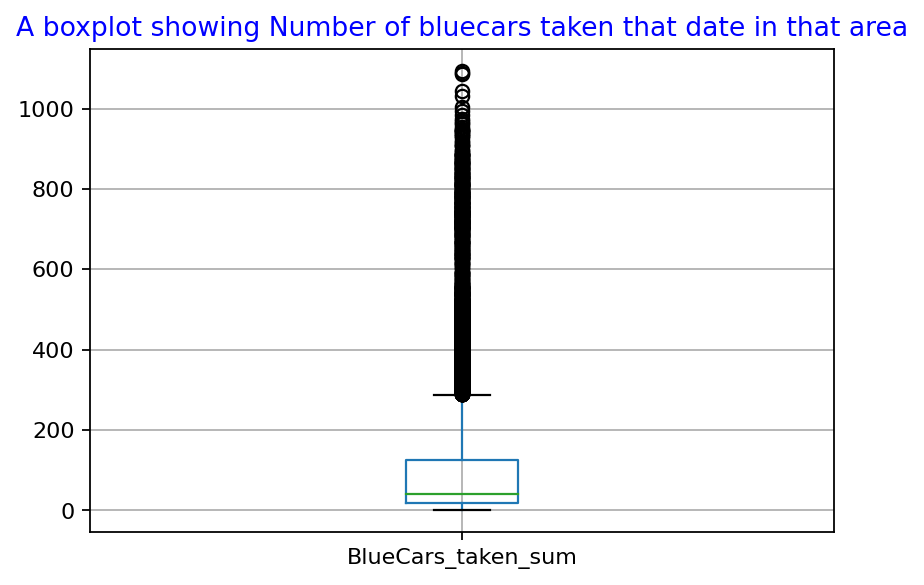

In [10]:
#Ill use a box plot to check for outliers
plt.figure(dpi = 160)
df.boxplot(['BlueCars_taken_sum'])
plt.title("A boxplot showing Number of bluecars taken that date in that area", color = 'blue')
plt.show()
#The boxplot shows outliers, though we are not going to drop it


## **Univariative Analysis**

**Frequency tables**

In [11]:
#Ill first check the total sum of bluecars returned during the weekdays(excluding weekends)
df.groupby('dayOfWeek')[['BlueCars_taken_sum']].sum().sort_values('BlueCars_taken_sum', ascending=False)
#We will exclude Saturday and Sunday for the analysis
#On weekdays,Friday was the day when bluecars were returned


,BlueCars_taken_sum
dayOfWeek,
4,288546
0,263893
3,263207
1,261940
2,261849


***Central Tendacy***

Summative description of a dataset through a single value that reflects the center of the data distribution.

The following measures can be used to describe central tendency;

Mean - This represents the sum of all values in a dataset divided by the total number of the values.

Mode - This represents the most frequently occurring value in a dataset.

Median - This is the middle value in a dataset when it is arranged in ascending order.


In [12]:
df.describe()

,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000
mean,88789.959286,1.973926,116.028673,115.639380,3.424983,3.417620,7.999047,7.975485,20.945166,20.921431
std,7647.995374,1.417797,169.626905,168.344751,5.379950,5.349742,11.963164,11.882660,47.900208,47.848580
min,75001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1.000000,18.000000,19.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,2.000000,42.000000,42.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,3.000000,126.000000,126.000000,4.000000,4.000000,9.000000,9.000000,4.000000,5.000000
max,95880.000000,4.000000,1093.000000,1056.000000,47.000000,49.000000,94.000000,94.000000,288.000000,294.000000


In [13]:
#Ill then get the mean of relevant columns
mean_col = ['BlueCars_returned_sum', 'BlueCars_taken_sum', 'Slots_freed_sum', 'Slots_taken_sum']

for column in mean_col:
  print('mean of {}: {:.2f}' .format(column, df[column].mean()))

mean of BlueCars_returned_sum: 115.64
mean of BlueCars_taken_sum: 116.03
mean of Slots_freed_sum: 20.95
mean of Slots_taken_sum: 20.92


In [14]:
#Ill then find the median of the relevant columns
mean_col = ['BlueCars_returned_sum', 'BlueCars_taken_sum', 'Slots_freed_sum', 'Slots_taken_sum']

for column in mean_col:
  print('median of %s: %d' % (column, df[column].median()))

median of BlueCars_returned_sum: 42
median of BlueCars_taken_sum: 42
median of Slots_freed_sum: 0
median of Slots_taken_sum: 0


In [15]:
#Ill then find the mode of the relevant columns
mean_col = ['BlueCars_returned_sum', 'BlueCars_taken_sum', 'Slots_freed_sum', 'Slots_taken_sum','dayOfWeek']
for column in mean_col:
  print('mode of %s: %d' % (column, df[column].mode()))
  


mode of BlueCars_returned_sum: 12
mode of BlueCars_taken_sum: 12
mode of Slots_freed_sum: 0
mode of Slots_taken_sum: 0
mode of dayOfWeek: 0


**Dispersion**

Dispersion or measure of dispersion tells us the variation of the data from one another and gives us a clear idea of the distribution of the data.
Common examples of dispersion measure are;

Variance

Standard deviation 

Range

Quartile deviation

In [16]:
# Ill first get the standard deviation of BlueCars_returned_sum, BlueCars_taken_sum, Slots_freed_sum, Slots_taken_sum
mean_col =  ['BlueCars_returned_sum', 'BlueCars_taken_sum', 'Slots_freed_sum', 'Slots_taken_sum']

for column in mean_col:
  print('Standard deviation of {}: {:.2f}' .format(column, df[column].std()))
# As you can see,there is great standard deviation in the distribution of the sum of bluecars taken

Standard deviation of BlueCars_returned_sum: 168.34
Standard deviation of BlueCars_taken_sum: 169.63
Standard deviation of Slots_freed_sum: 47.90
Standard deviation of Slots_taken_sum: 47.85


In [17]:
#Ill then get the skewness of BlueCars_returned_sum, BlueCars_taken_sum, Slots_freed_sum, Slots_taken_sum
mean_col =  ['BlueCars_returned_sum', 'BlueCars_taken_sum', 'Slots_freed_sum', 'Slots_taken_sum']

for column in mean_col:
  print('Skewness of {}: {:.2f}' .format(column, df[column].skew()))

Skewness of BlueCars_returned_sum: 2.33
Skewness of BlueCars_taken_sum: 2.33
Skewness of Slots_freed_sum: 2.54
Skewness of Slots_taken_sum: 2.54


In [18]:
#Ill then get the variance of BlueCars_returned_sum, BlueCars_taken_sum, Slots_freed_sum, Slots_taken_sum
mean_col =  ['BlueCars_returned_sum', 'BlueCars_taken_sum', 'Slots_freed_sum', 'Slots_taken_sum']

for column in mean_col:
  print('Variance of {}: {:.2f}' .format(column, df[column].var()))

Variance of BlueCars_returned_sum: 28339.96
Variance of BlueCars_taken_sum: 28773.29
Variance of Slots_freed_sum: 2294.43
Variance of Slots_taken_sum: 2289.49


In [19]:
#Ill then get the kurtosis of the variable mean_col
mean_col =  ['BlueCars_returned_sum', 'BlueCars_taken_sum', 'Slots_freed_sum', 'Slots_taken_sum']
for column in mean_col:
  print('Kurtosis of {}: {:.2f}' .format(column, df[column].kurt()))


Kurtosis of BlueCars_returned_sum: 5.54
Kurtosis of BlueCars_taken_sum: 5.55
Kurtosis of Slots_freed_sum: 6.01
Kurtosis of Slots_taken_sum: 6.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


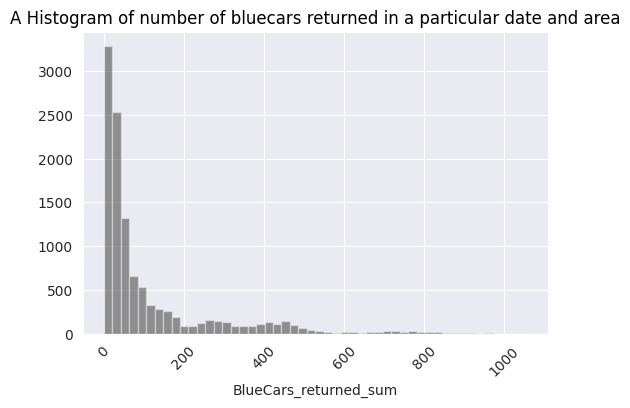

In [20]:
#Ill then plot a histogram of bluecars returned sum
plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(df["BlueCars_returned_sum"], kde = False, color = 'black')
plt.title("A Histogram of number of bluecars returned in a particular date and area", color = 'black')
plt.xticks(rotation = 45)
plt.show()

## **Bivariative Analysis**


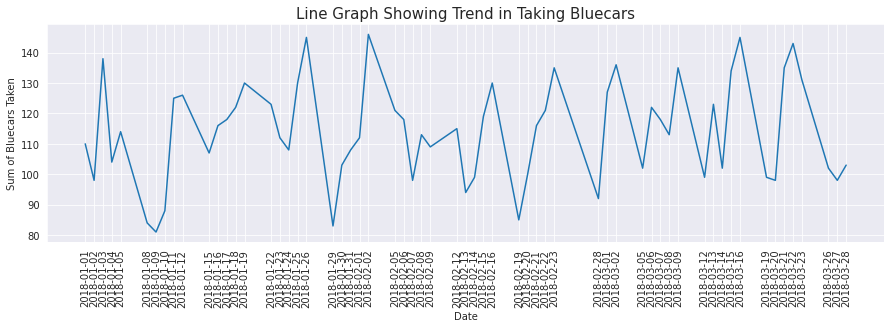

In [21]:
eletric= df.iloc[:61,:]   # selecting the first 60 observations from the autob dataframe.

# plotting a line graph of sum of bluecars taken and sum of recharging slots freed
plt.figure(figsize=(15,4))
plt.plot(eletric.date, eletric.BlueCars_taken_sum)
plt.xticks(eletric.date, rotation=90)

plt.xlabel('Date')
plt.ylabel('Sum of Bluecars Taken')
plt.title('Line Graph Showing Trend in Taking Bluecars', fontsize=15)
plt.show()

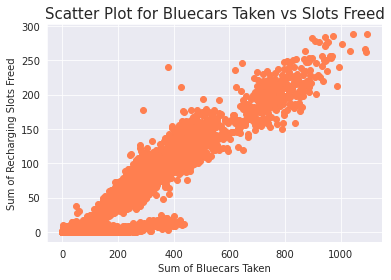

In [22]:
#Ill then plot a Scatterplot of the bluecars taken vs the slots freed
plt.figure(figsize=(6,4))
plt.scatter(df.BlueCars_taken_sum, df.Slots_freed_sum, color='coral')
plt.xlabel('Sum of Bluecars Taken')
plt.ylabel('Sum of Recharging Slots Freed')
plt.title('Scatter Plot for Bluecars Taken vs Slots Freed', fontsize=15)
plt.show()
#The scatter plot shows the sum of bluecars taken and sum of slots freed are highly correlated
#Hence a positive corelation

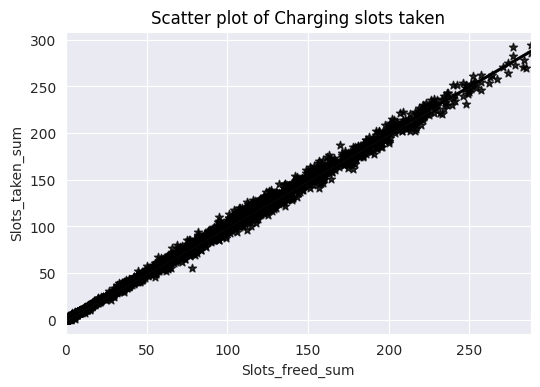

In [23]:
#Ill then plot a scatterplot showing Charging slots 
plt.figure(dpi = 100)
sns.regplot(x = df["Slots_freed_sum"], y = df["Slots_taken_sum"], fit_reg=True, color = 'black', marker = '*')
plt.title("Scatter plot of Charging slots taken", color = 'black')
plt.show()


***Correlation***

In [24]:
#Ill then get the correlation between the sum of blue cars and the utilibs taken
Correlation1 = df.BlueCars_taken_sum.corr(df.Utilib_taken_sum, method='pearson')
print('correlation coefficient: %.4f' % Correlation1)
#The is a positive correlation

correlation coefficient: 0.8842


In [73]:
#Ill then get the correltion between BlueCars taken and BlueCars returned

Correlation2 = df.BlueCars_taken_sum.corr(df.BlueCars_returned_sum, method='pearson')
print('correlation coefficient: %.4f' % Correlation2)

# #Their is a perfect linear correlation.

correlation coefficient: 0.9988


# **Hypothesis Testing**

***SIMPLE RANDOM SAMPLING***

In [25]:
#Ill then use simple random sampling to create samples from the dataset
df_1 = df.sample(frac=0.3, random_state=101)
df_1.head()

,Postal code,date,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5677,92170,2018-03-09,4,83,84,0,0,5,4,0,0
3738,78140,2018-06-15,4,31,31,1,0,4,4,0,0
7153,92270,2018-05-31,3,30,24,0,0,3,5,0,0
14707,94340,2018-01-26,4,48,51,0,0,4,3,0,0
7921,92330,2018-05-08,1,44,40,1,2,5,9,4,2


In [26]:
#Ill then group the days of the week with the sum of the BlueCars

df_2 = df_1.groupby('dayOfWeek')[['BlueCars_taken_sum']].sum().reset_index()
df_2['dayOfWeek'] = df_2['dayOfWeek'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday',})
df_2

,dayOfWeek,BlueCars_taken_sum
0,Monday,80151
1,Tuesday,81031
2,Wednesday,79700
3,Thursday,80698
4,Friday,89593


In [27]:
analysis = list(df_2['BlueCars_taken_sum'])
analysis1 = sum(analysis)
analysis2= [round(analysis1/5)]

# magnitude of repetition declaration
mag = 5

analysis2 = [item for item in analysis2 for i in range(mag)]

analysis2

[82235, 82235, 82235, 82235, 82235]

In [28]:
#Ill use the chi-square test because we are working with 2 category features 
import scipy, scipy.stats
from scipy.stats import chisquare
greg = scipy.array(analysis)
katono = scipy.array(analysis2)

gk = chisquare(f_obs=greg, f_exp=katono) 
print('Chi square test statistic: {} \np value: {}'.format(gk[0],gk[1]))
print('p value rounded off to four dp:', round(gk[1],4))

Chi square test statistic: 835.6713078372956 
p value: 1.4398750459546759e-179
p value rounded off to four dp: 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  """


**Conclusion**

Since the p value is less than 0.05, we reject the null Hypothesis.
